In [14]:
import pandas as pd
import numpy as np

In [5]:
pgh_public_art = pd.read_csv("https://data.wprdc.org/datastore/dump/00d74e83-8a23-486e-841b-286e1332a151",
                           index_col="id", 
                           parse_dates=True)

pgh_public_art.head()

,name,title,artist_name,art_type,park,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,
812728309,1001,Oakwood Road Monument,NaN,NaN,NaN,NaN,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429192,-80.066225
188255168,1002,Rooster Waiting For The Streetcar,James Simon,Modern and Contemporary Art,NaN,NaN,Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.442926,-80.039711
2032091917,129,Middle East Memorial Plaque,NaN,War Memorials,NaN,NaN,Central Business District,6.0,1.0,4.200302e+10,6.0,1.0,2.0,1-4,40.438092,-79.996852
1447629273,143,L'Enfant,Paul Roger-Bloche,Historic Art,NaN,NaN,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-23,40.388748,-79.986497
1935017944,148,Veterans Memorial (Brookline),NaN,War Memorials,Brookline Monument,NaN,Brookline,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-26,40.391721,-80.016981


In [6]:
art = pgh_public_art[['neighborhood','art_type']]
art.head(10)

,neighborhood,art_type
id,,
812728309,Oakwood,NaN
188255168,Elliott,Modern and Contemporary Art
2032091917,Central Business District,War Memorials
1447629273,Carrick,Historic Art
1935017944,Brookline,War Memorials
752311791,South Side Slopes,Modern and Contemporary Art
915929762,NaN,Modern and Contemporary Art
275033545,Hazelwood,Modern and Contemporary Art
687548560,Highland Park,Modern and Contemporary Art


In [7]:
art['neighborhood'].value_counts()

Central Business District    27
Squirrel Hill South          22
Allegheny Center             18
Highland Park                10
South Side Flats             10
Beechview                     8
North Shore                   8
Shadyside                     6
Central Oakland               5
Lower Lawrenceville           5
Brighton Heights              5
Hazelwood                     4
Spring Hill-City View         4
Carrick                       3
Greenfield                    3
South Side Slopes             3
Point Breeze                  3
Duquesne Heights              3
Elliott                       3
Beltzhoover                   3
Crawford-Roberts              3
Garfield                      2
Perry North                   2
Mount Washington              2
Squirrel Hill North           2
Lincoln-Lemington-Belmar      2
Central Lawrenceville         2
East Allegheny                2
Upper Hill                    2
Strip District                2
Regent Square                 2
Brooklin

In [8]:
art_projects = art.groupby("neighborhood").count()
art_projects.head(15)

,art_type
neighborhood,
Allegheny Center,18
Allegheny West,1
Allentown,2
Beechview,5
Beltzhoover,3
Bloomfield,1
Brighton Heights,5
Brookline,2
Carrick,3


In [9]:
import pandas as pd
import geopandas
%matplotlib inline

<AxesSubplot:>

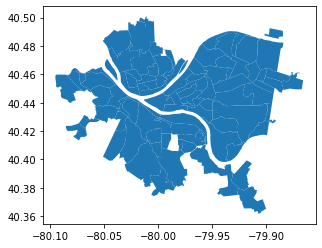

In [10]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
neighborhoods.plot() 

### Perhaps just as common, the .tsv

In [11]:
art_map = neighborhoods.merge(art_projects, how='left', left_on='hood', right_on='neighborhood')
art_map[['hood','art_type','geometry']].head(10)

,hood,art_type,geometry
0,Central Oakland,5.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,1.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,NaN,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,3.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,2.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
5,Central Business District,27.0,"POLYGON ((-79.99238 40.44484, -79.99233 40.444..."
6,Spring Hill-City View,4.0,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
7,Perry South,1.0,"POLYGON ((-80.01456 40.47727, -80.01462 40.477..."
8,Summer Hill,NaN,"POLYGON ((-80.01087 40.50097, -80.01073 40.499..."
9,Northview Heights,NaN,"POLYGON ((-80.00327 40.48271, -80.00326 40.482..."


<AxesSubplot:>

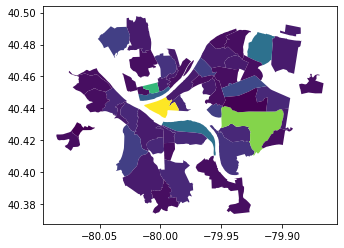

In [12]:
art_map.plot(column='art_type')

<AxesSubplot:>

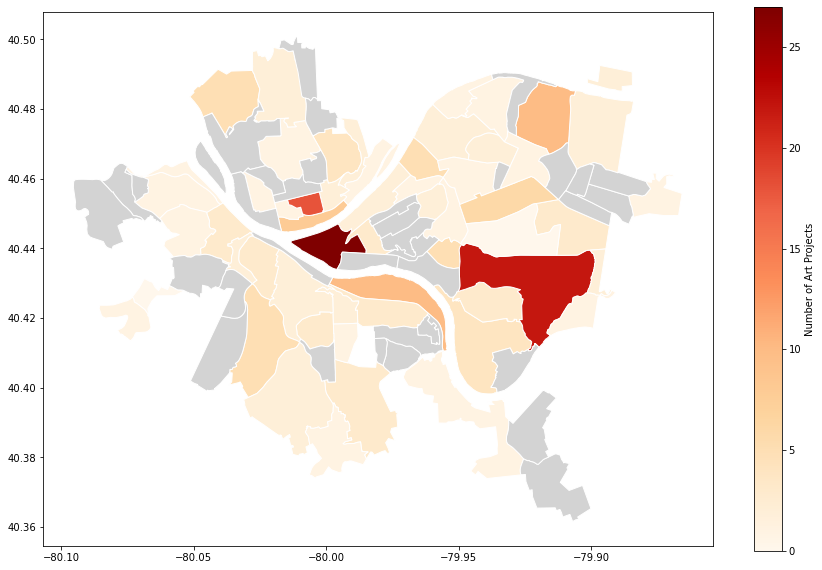

In [13]:
art_map.plot(column='art_type', 
               cmap='OrRd',             
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Number of Art Projects"},
               figsize=(15, 10),        
               missing_kwds={"color": "lightgrey"}
               )